Для начала надо выяснить, что такое нейрон.

![тут должна была быть картинка с нейроном, но что-то пошло не так](https://cdn.thinglink.me/api/image/715269054151000064/1240/10/scaletowidth "нейрон")

У него есть асконы, тело и дендриты. (бла-бла).
Но наш будет чуток попроще.

![тут должна была быть картинка с нейроном, но что-то пошло не так](http://concepture.club/common/uploads/articles_gallery/501/1489768906.png "ещё нейрон")

Чтож, давайте научем кампухтер отличать цифру 5 от остальных

мы будем ползоваться активационной функцией v > BIAS, причём я тоталитарно объявляю BIAS равным семи

In [1]:
BIAS = 7

я тут приготовил немного данных для нашей перцептронки:

In [2]:
from prepared import printWeights, printNums, printNum
from prepared import train_nums, defected_fives
from prepared import sample_good_weight, sample_middle_weight, sample_bad_weight

10 цифр:

0 ) [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1]
1 ) [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
2 ) [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
3 ) [1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]
4 ) [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1]
5 ) [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1]
6 ) [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1]
7 ) [1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
8 ) [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
9 ) [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]

а на картинке выглядит вот-так:


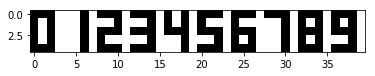

In [3]:
for i in range(len(train_nums)):
    print(i,')',train_nums[i])
print()
print('а на картинке выглядит вот-так:')
printNums(train_nums)

и чуток битых пятёрок:

0 ) [1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1]
1 ) [1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]
2 ) [1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1]
3 ) [1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1]
4 ) [1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1]
5 ) [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1]

а на картинке выглядит вот-так:


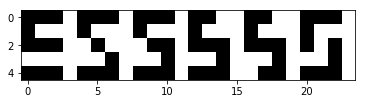

In [4]:
for i in range(len(defected_fives)):
    print(i,')',defected_fives[i])
print()
print('а на картинке выглядит вот-так:')
printNums(defected_fives)

интуитивно мы ожидаем, что мы получим карту весов, похожую на пятёрку, но на самом деле, это не так (и мы обязательно потом это проверим)

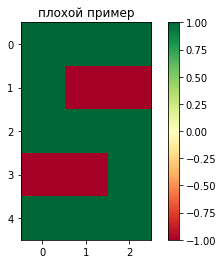

In [5]:
printWeights(sample_bad_weight, 'плохой пример')

для начала давайте напишем функцию -- предсказатель: она получает на вход веса и число на проверку а на выходе выдаёт вердикт: "пятёрка ли число?" (естественно в True / False формате)

In [ ]:
def predict(w, x):
    v = 0
    
    #надо положить в v взвешенную сумму входов
    
    return v > BIAS # акивационную функцию я уж за вас написал, уж не обессудьте

давайте сразу проверим нашу функцию, грабительски позаимствовав пример хороших весов из моих закромов:

In [ ]:
for i in range(10):
    print(i,'is 5 --', predict(sample_good_weight, train_nums[i]))

проконтролируем, что "True" находится только напротив утверждения "5 is 5". И если так, то мы классные и идём дальше.

Кстати говоря, выяснить почему тот вес, который я чуть выше назвал "интуитиво ожидаемым но плохим", действительно плохой мы можем уже сейчас. Давайте просто выведем все числа, коорые с этими весами будут приняты за пятёрку:

In [ ]:
for i in range(10):
    if predict(sample_bad_weight, train_nums[i]):
        printNum(train_nums[i], i)

многовато лишнего, не правда ли?

До сих пор было не совсем понятно, откуда берутся веса, чтож...

Функция тренировки получает на вход старые веса, число для тренировки, и результат который мы хотим достичь для этого числа.
Она должна проверить получается ли верный ответ при использовании старых весов (не без помощи функции predict), и если не поучается, взять и покарать их!
Кого "их"? Те веса, которые повлияли на ответ в той мере, в которой они повлияли на ответ. Варианты определения меры наказания бывают различны, но мы будем сегодня пользоваться
`w[i] = w[i] + (то_значение_которе_хотели - то_значение_которе_получили) * x[i]`

Ну и наконец, как в случае, если мы меняли веса, так в случае, если не меняли, мы должны вернуть те веса, которые теперь считаем верными

In [ ]:
def fit(w, x, target_ans):
    
    # за учёбу!
    
    
    return w  # и результат работы не забываем миру демонстровать

на эту функцию хорошего теста я не придумал, так что пока поверю вам на слово

теперь давайте напишем функцию, обучающую наш нейрон с нуля

эта функция в начале создаёт список весов, и затем, до тех пор пока нейрон не научится правильно делать предсказание (при помощи функции predict) на обучающей выборке (в нашем случае это train_nums)

но, для того, чтобы слегка упростить себе задачу, давайте отдельно напишем функцию, которая определяет, делает ли нейрон верное предсказание на всей выборке. для этого для всех десяти цифр `i` мы должны удостоверится, что `predict(w, train_nums[i])` соответствует значению `i == 5`

In [ ]:
def allTrainRight(w):
    # я собсна всё уже изложил: дерзаем

для тестирования этой функции, воспользуемся нашим старыми знакомыми -- хорошим и плохим примером:

In [ ]:
if allTrainRight(sample_good_weight) and not allTrainRight(sample_bad_weight):
    print('функция и вправду работает правдоподобно')
else:
    print('эээ нет, тут что-то не так')

теперь займёмся наконец функцией обучения, только сначала, я импортирую функцию randint:
`randint(0, 9)` -- один из немногих способов ~~сделать мир лучше~~ получить случайное число от одного до девяти

In [7]:
from random import randint

просто давайте посмотрим на то, правда ли он выдаёт цифры

In [8]:
for i in range(50):
    print(randint(0,9), end=' ')

1 9 7 7 4 3 1 3 2 9 8 3 6 9 7 4 4 1 7 7 7 9 4 3 4 1 4 9 8 7 3 9 7 2 4 4 9 2 0 1 4 1 1 7 1 6 7 8 6 3 

теперь точно всё, но на всякий случай напомню основные моменты:
* создаём список свежих весов `w`
* цикл
    * пока не `allTrainRight`
    * создаём случайное число `curr`
    * `w = fit(w, train_nums[curr], curr == 5)`
    * при желании можно вывести `w` на экран
* возвращаем `w`

In [ ]:
def cram():
    w = [0] * len(train_nums[0])
    
    # здесь должен был быть цикл, но враги ограбили(...
  
    return w

чтож...  тест тут только один

In [ ]:
your_first_neuron = cram()

на случай ошибок или долгого зависания, напомню, что мы тестируем здесь не только функцию `cram` но и `fit` и возможно ошибка в ней

итак, наш первый нейрон готов, давайте выведем его веса и нарисуем его карту

In [ ]:
printWeights(your_first_neuron)
print(your_first_neuron)

он, прямо как тот эталонный нейрон из закромов абсолютно точно правильно отрабатывает на всей обучающей выборке:

In [ ]:
for i in range(10):
    print(i,'is 5 --', predict(your_first_neuron, train_nums[i]))

Но помните, я ещё импортировал набор битых пятёрок?
Я вот помню.

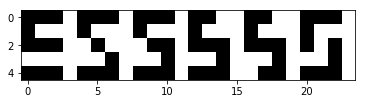

In [6]:
printNums(defected_fives)

когда наш нейрон учился, он в глаза не видел этих монстров, но давайте проверим, признает в них пятёрки?

In [ ]:
for i in range(len(defected_fives)):
    print(predict(your_first_neuron, defected_fives[i]))

Если только что мы получили столбец из `True`, то поздравляю: эта нейронка сходу обладает обобщательной способностю, если же нет, то в этом нет ниьчьей вины: так иногда случается. 

У меня в закромах есть такой и такой нейрон

In [ ]:
print('на обучающей выборке он:', allTrainRight(sample_middle_weight))
print()
print('а на тестовой:')
for i in range(len(defected_fives)):
    print('\t\t',predict(sample_middle_weight, defected_fives[i]))

в качестве завершения, хочу предложить вам написать функцию, которая вызывает `cram` до тех пор, пока её результат не пройдёт проверку на тестовой выборке

In [ ]:
# тут уж без подсказок